In [175]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


### Limitations/constraints equations

#### Time per week Constraints

X/200 + y/140 = 40

#### Production Max Cobstarints for both Type x and Type Y

x ≤ 6000;
y ≤ 4000

In [157]:
x = np.linspace(0, 6000, 1000) # generate 1000 equaly spaced values between 0 and 6000 
y = np.linspace(0, 4000, 1000 ) # generate 1000 equaly spaced values between 0 and 4000


### Plotting the Grap of Constraints

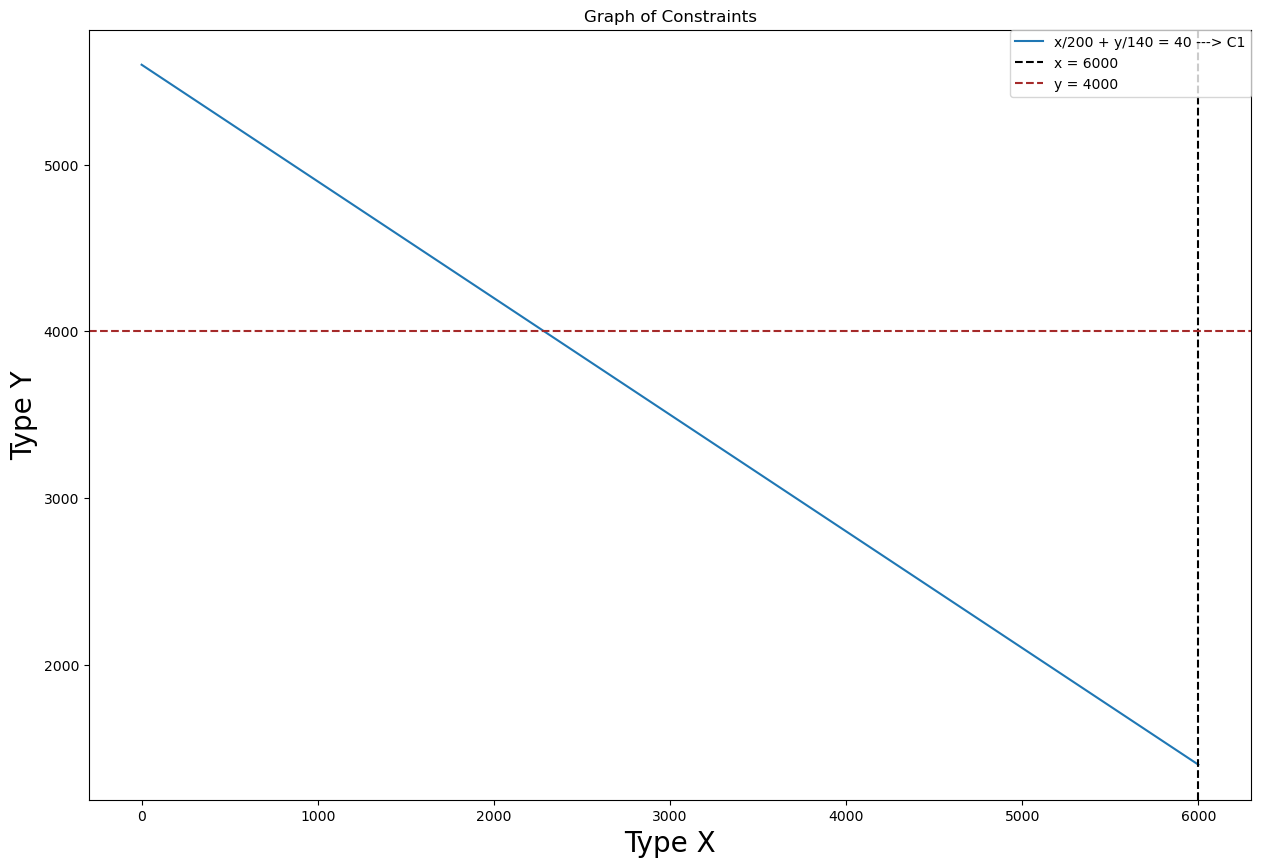

<Figure size 640x480 with 0 Axes>

In [158]:
# determine the plot size
plt.figure(figsize= (15, 10))

# Plot the constraint equation
plt.plot(x, 140*(40 - x/200), label="x/200 + y/140 = 40 ---> C1")

# Plot the constraint lines
plt.axvline(x=6000, color='k', linestyle='--', label="x = 6000")
plt.axhline(y=4000, color='brown', linestyle='--', label="y = 4000")


# # limits
plt.title('Graph of Constraints')
plt.xlabel('Type X', fontsize = 20)
plt.ylabel('Type Y', fontsize = 20)

# # legend
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)


plt.show();
plt.savefig("figure.png")

### Marking out the Feasible Region

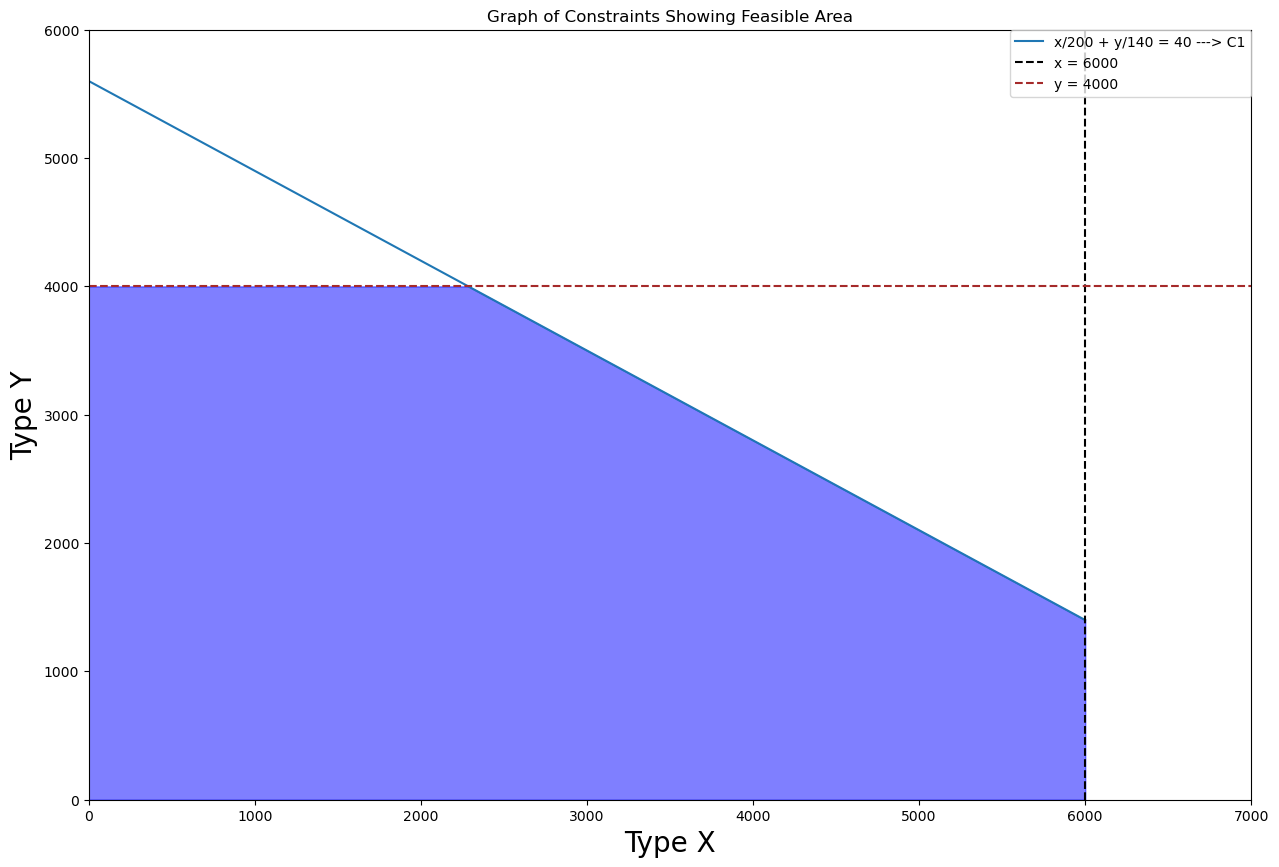

In [159]:
# determine the plot size
plt.figure(figsize= (15, 10))

# Plot the constraint equation
plt.plot(x, 140*(40 - x/200), label="x/200 + y/140 = 40 ---> C1")

# Plot the constraint lines
plt.axvline(x=6000, color='k', linestyle='--', label="x = 6000")
plt.axhline(y=4000, color='brown', linestyle='--', label="y = 4000")


# # limits
plt.title('Graph of Constraints Showing Feasible Area')
plt.ylim((0, 6000))
plt.xlim((0, 7000))
plt.xlabel('Type X', fontsize = 20)
plt.ylabel('Type Y', fontsize = 20)

# fill in the feasible region
plt.fill_between(x, # regular item 1 
                  np.minimum(140*(40 - x/200), 4000), # choose the minimum between x2 from two eqns
                 where = x >= 0, # defines any condition that might need to considered
                 color ='blue', # shaded region
                 alpha = 0.50) # transparency level

# legend placement
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.savefig("figure1.png")
plt.show();

In [160]:
from scipy.optimize import linprog
from scipy.optimize import minimize

In [161]:
# Construct parameters
profit = np.array([25, 30]) #comes from the coefficients of the profit equation

# Inequality constraints
limitations = np.array([[1/200, 1/140], # first row comes from constriants 1
                     [1, 0], [0, 1]])  # second row comes from constraints 2

constraints = np.array([40, 6000, 4000]) # max amount of constraint


# Solve the problem
# we put a negative sign on the objective as linprog does minimization by default
production = linprog(-profit, A_ub = limitations, b_ub = constraints, method='revised simplex')

print('Optimal value:', abs(round(production.fun, ndigits=2)),
      '\nAmount of Type X:', round(production.x[0]),
      '\nAmount of Type Y:', round(production.x[1]),
      '\nStatus:', production.message)

Optimal value: 192000.0 
Amount of Type X: 6000 
Amount of Type Y: 1400 
Status: Optimization terminated successfully.


### Production Graph showing the optimal point of production

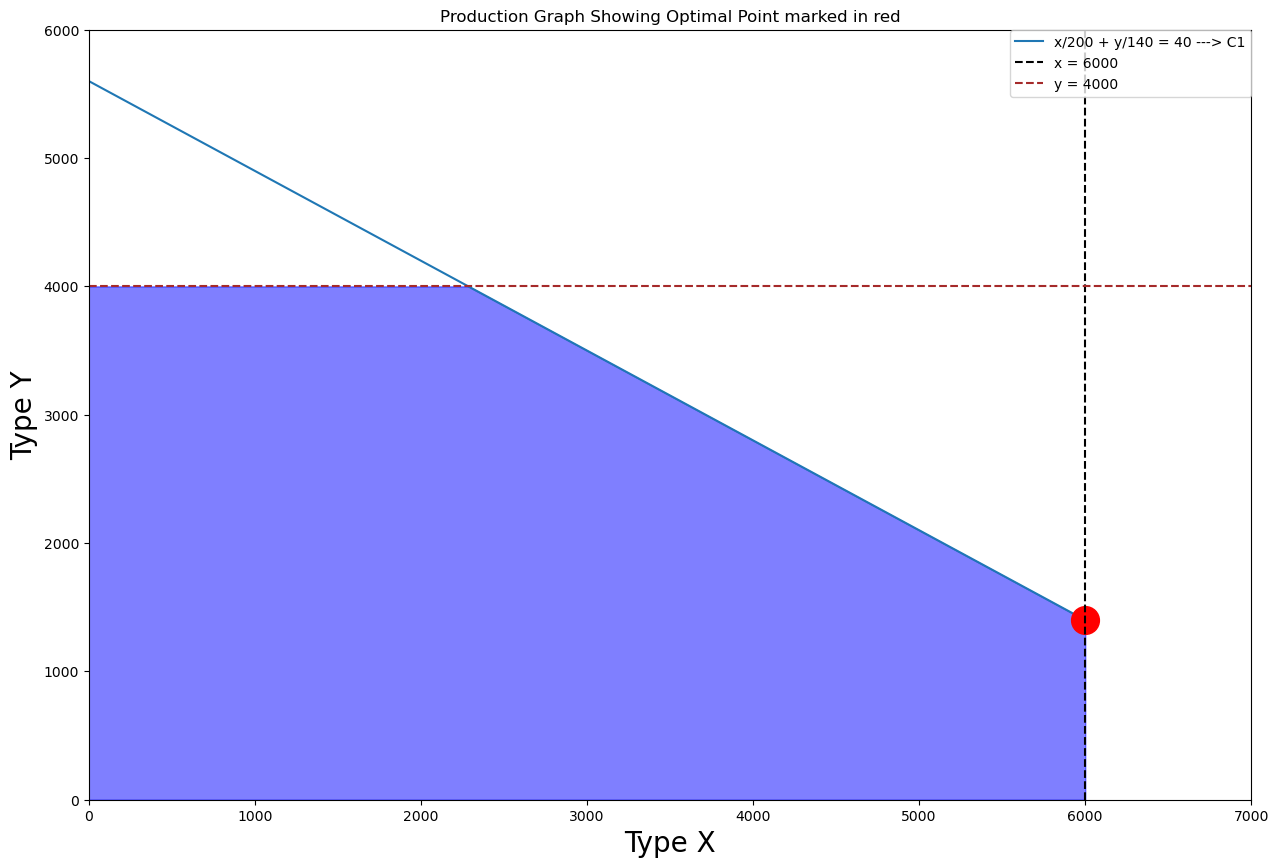

In [162]:
# determine the plot size
plt.figure(figsize= (15, 10))

# Plot the constraint equation
plt.plot(x, 140*(40 - x/200), label="x/200 + y/140 = 40 ---> C1")
plt.plot(production.x[0], production.x[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")

# Plot the constraint lines
plt.axvline(x=6000, color='k', linestyle='--', label="x = 6000")
plt.axhline(y=4000, color='brown', linestyle='--', label="y = 4000")


# # limits
plt.title('Production Graph Showing Optimal Point marked in red')
plt.ylim((0, 6000))
plt.xlim((0, 7000))
plt.xlabel('Type X', fontsize = 20)
plt.ylabel('Type Y', fontsize = 20)

# fill in the feasible region
plt.fill_between(x, # regular item 1 
                  np.minimum(140*(40 - x/200), 4000), # choose the minimum between x2 from two eqns
                 where = x >= 0, # defines any condition that might need to considered
                 color ='blue', # shaded region
                 alpha = 0.50) # transparency level

# legend placement
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.savefig("figure3.png")
plt.show();

## Scenario test for Production of only Type Y device

In [163]:
# Construct parameters
profit = np.array([25, 30]) #comes from the coefficients of the profit equation

# Inequality constraints
limitations = np.array([[1/200, 1/140], # first row comes from constriants 1
                     [1, 0], [0, 1]])  # second row comes from constraints 2

constraints = np.array([40, 0, 4000]) # max amount of constraint


# Solve the problem
# we put a negative sign on the objective as linprog does minimization by default
production = linprog(-profit, A_ub = limitations, b_ub = constraints, method='revised simplex')

print('Optimal value:', abs(round(production.fun, ndigits=2)),
      '\nAmount of Type X:', round(production.x[0]),
      '\nAmount of Type Y:', round(production.x[1]),
      '\nStatus:', production.message)

Optimal value: 120000.0 
Amount of Type X: 0 
Amount of Type Y: 4000 
Status: Optimization terminated successfully.


In [167]:
y = list(np.linspace(0,4000,5, dtype=int))
def get_x(y):
    if 200 *(40 -y//140 ) > 6000:
        return 6000
    else:
        return 200 *(40 -y//140 )
    
x = [get_x(j) for j in y]

profit = [25*x[l] + 30*y[l] for l in range(len(x))]
x.append(6000)
y.append(1400)
profit.append(192000)
print(x,y,profit)

[6000, 6000, 5200, 3800, 2400, 6000] [0, 1000, 2000, 3000, 4000, 1400] [150000, 180000, 190000, 185000, 180000, 192000]


In [168]:
dict = {'Type X': x, 'Type Y': y, 'Profit': profit}

In [170]:
import pandas as pd
df = pd.DataFrame(dict)
df2 = df.sort_values(by=['Type Y', 'Type X'])
print(df2)

   Type X  Type Y  Profit
0    6000       0  150000
1    6000    1000  180000
5    6000    1400  192000
2    5200    2000  190000
3    3800    3000  185000
4    2400    4000  180000


In [171]:
df.style.highlight_max('Profit',color = 'lightgreen', axis = 0)

,Type X,Type Y,Profit
0,6000,0,150000
1,6000,1000,180000
2,5200,2000,190000
3,3800,3000,185000
4,2400,4000,180000
5,6000,1400,192000


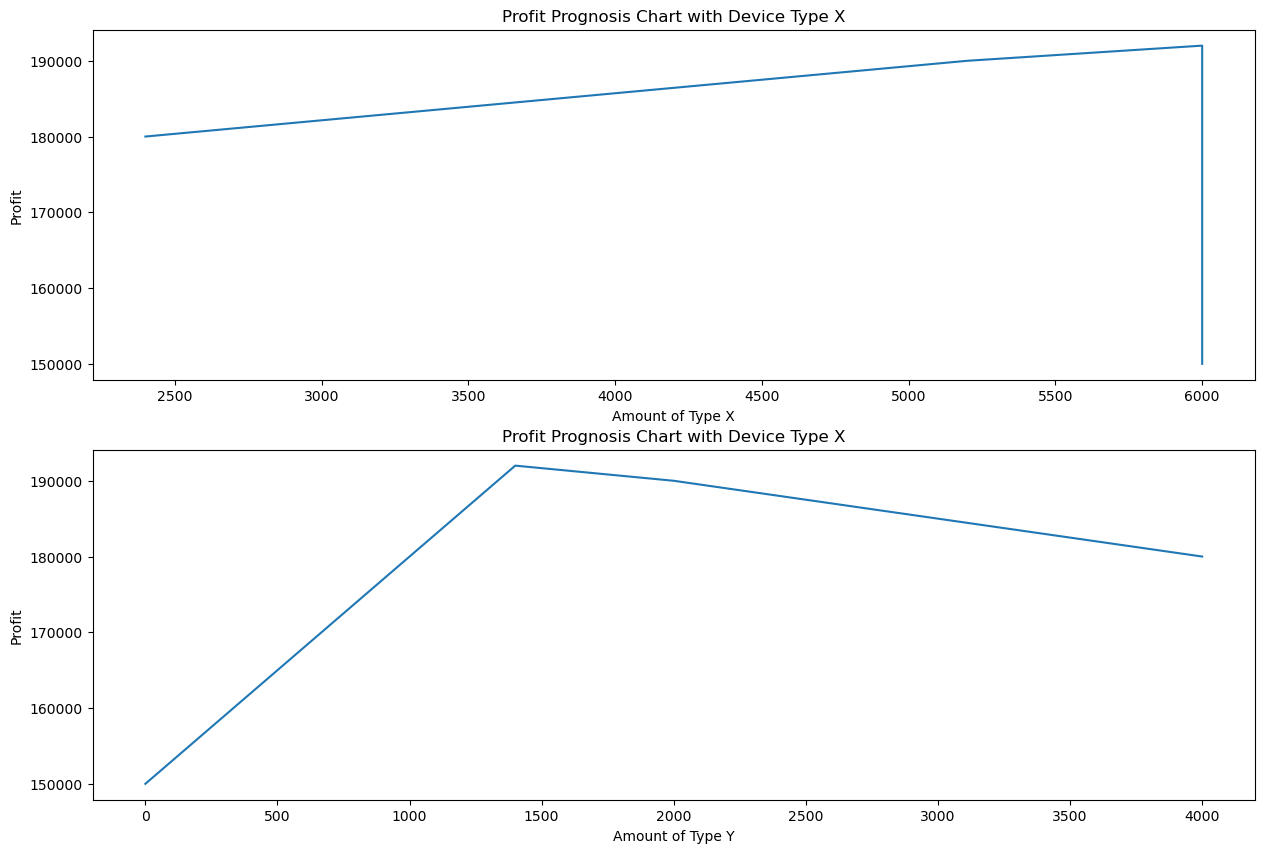

In [172]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(df2['Type X'], df2['Profit'])
ax[0].set_title('Profit Prognosis Chart with Device Type X')
ax[0].set_xlabel("Amount of Type X")
ax[0].set_ylabel("Profit")
ax[1].plot(df2['Type Y'], df2['Profit'])
ax[1].set_title('Profit Prognosis Chart with Device Type X')
ax[1].set_xlabel("Amount of Type Y")
ax[1].set_ylabel("Profit")
ax
plt.savefig("figure4.png")